# Question 1
1.Read the Iris dataset from Scikit Learn (a copy of the dataset is provided) using sklearn datasets.load.

In [2]:
from sklearn import neighbors, datasets, model_selection, metrics, preprocessing
import matplotlib.pyplot as plt
#1.创建对象,指定return_X_y
data = datasets.load_iris(return_X_y=True)
print(type(data))
x=data[0]
y=data[1]
print(x.shape)            # (150, 4)
print(y.shape)            #(150,)

<class 'tuple'>
(150, 4)
(150,)


2. use scikit-learn train_test_split to randomly split the data into training (75%) and testing (25%) set.

In [10]:
train_X,test_X,train_y,test_y = model_selection.train_test_split(x,y,test_size=0.25)

3. Using scikit-learn neighbors.KNeighborsClassifier to build a basic kNN classifier model for this dataset. You can use either metrics.accuracy_score, or knn.score to obtain the prediction accuracy.

In [11]:
clf=neighbors.KNeighborsClassifier()
clf.fit(train_X,train_y)
train_predict = clf.predict(train_X)
test_predict = clf.predict(test_X)
print("Training Score:%f"%metrics.accuracy_score(train_y, train_predict, normalize=True, sample_weight=None))
print("Testing Score:%f"%metrics.accuracy_score(test_y, test_predict, normalize=True, sample_weight=None))

Training Score:0.982143
Testing Score:0.973684


4.Explore the impact of adopting various values of k (k=1, 3, 5, 7) on your model, different distance metrics and algorithms.

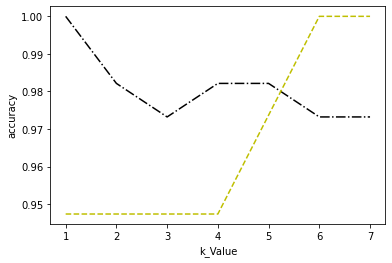

In [12]:
result01 = []
result02 = []
for i in range(1,8):
    clf=neighbors.KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_X,train_y)

    #使用metrics.accuracy_core或nn.core来获取预测精确度。
    train_predict = clf.predict(train_X)
    test_predict = clf.predict(test_X)
    result01.append(metrics.accuracy_score(train_y, train_predict, normalize=True, sample_weight=None))
    result02.append(metrics.accuracy_score(test_y, test_predict, normalize=True, sample_weight=None))
    
plt.plot(range(1,8), result01, 'k-.') 
plt.plot(range(1,8), result02, 'y--') 
plt.xlabel('k_Value')
plt.ylabel('accuracy')
plt.show()

5. Next normalise the data and re-run the experiment to see the impact on the prediction.

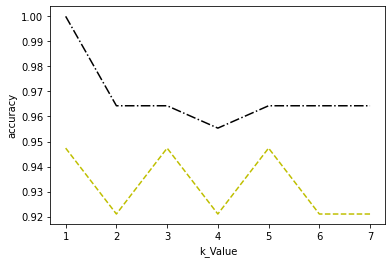

In [13]:
ss = preprocessing.StandardScaler()

train_X1 = ss.fit_transform(train_X)
test_X1 = ss.transform(test_X)

result01 = []
result02 = []

for i in range(1,8):
    clf=neighbors.KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_X1,train_y)

    #使用metrics.accuracy_core或nn.core来获取预测精确度。
    train_predict = clf.predict(train_X1)
    test_predict = clf.predict(test_X1)
    result01.append(metrics.accuracy_score(train_y, train_predict, normalize=True, sample_weight=None))
    result02.append(metrics.accuracy_score(test_y, test_predict, normalize=True, sample_weight=None))
    
plt.plot(range(1,8), result01, 'k-.') 
plt.plot(range(1,8), result02, 'y--') 
plt.xlabel('k_Value')
plt.ylabel('accuracy')
plt.show()

6.the impact of adopting different distance metrics

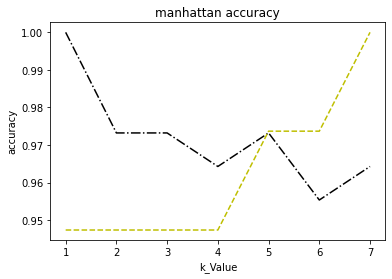

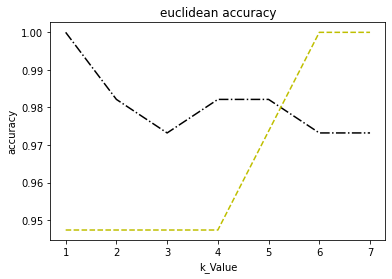

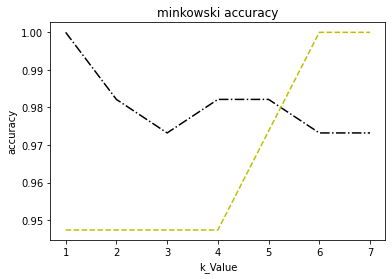

In [14]:
m = ''
for j in range(0,3):
    if j==0:
        m='manhattan'
    elif j==1:
        m='euclidean'
    elif j==2:
        m='minkowski'
    else:
        break
        
    result01 = []
    result02 = []

    for i in range(1,8):
        clf=neighbors.KNeighborsClassifier(n_neighbors=i, metric=m)
        clf.fit(train_X,train_y)

        #使用metrics.accuracy_core或nn.core来获取预测精确度。
        train_predict = clf.predict(train_X)
        test_predict = clf.predict(test_X)
        result01.append(metrics.accuracy_score(train_y, train_predict, normalize=True, sample_weight=None))
        result02.append(metrics.accuracy_score(test_y, test_predict, normalize=True, sample_weight=None))
    
    plt.title(m+" accuracy")
    plt.plot(range(1,8), result01, 'k-.') 
    plt.plot(range(1,8), result02, 'y--') 
    plt.xlabel('k_Value')
    plt.ylabel('accuracy')
    plt.show()


# Question 2
1. Read the Cancer dataset, which is available within DataLab2.zip, into a NumPy array.

In [3]:
import numpy as np

cancerTrain = np.loadtxt(r'cancerTrain.csv', delimiter=",")
cancerTest = np.loadtxt(r'cancerTest.csv', delimiter=",")

2. Using Scikit Learn build a basic kNN classifier model for this dataset (start with k=1 to 100, and then adjut the upper k value to see details) and assess its classification accuracy

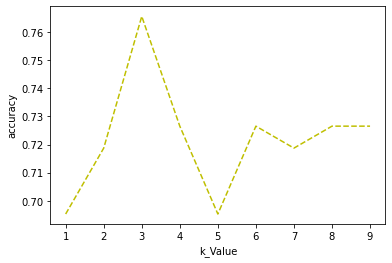

In [8]:
train_data = cancerTrain[:,[0,1,2,3,4]]
test_data = cancerTest[:,[0,1,2,3,4]]

train_label = cancerTrain[:,5]
test_label = cancerTest[:,5]

result02 = []

for i in range(1,10):
    clf=neighbors.KNeighborsClassifier(n_neighbors=i, p=1)
    clf.fit(train_data,train_label)
    test_predict_c = clf.predict(test_data)
    result02.append(metrics.accuracy_score(test_label, test_predict_c, normalize=True, sample_weight=None))
    
plt.plot(range(1,10), result02, 'y--') 
plt.xlabel('k_Value')
plt.ylabel('accuracy')
plt.show()

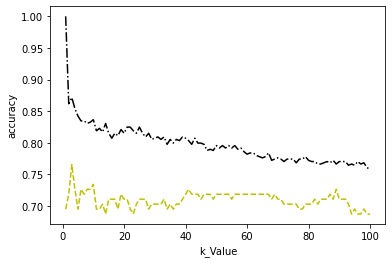

In [9]:
result01 = []
result02 = []

for i in range(1,101):
    clf=neighbors.KNeighborsClassifier(n_neighbors=i,p=1)
    clf.fit(train_data,train_label)
    train_predict_c = clf.predict(train_data)
    test_predict_c = clf.predict(test_data)
    result01.append(metrics.accuracy_score(train_label, train_predict_c, normalize=True, sample_weight=None))
    result02.append(metrics.accuracy_score(test_label, test_predict_c, normalize=True, sample_weight=None))
    
plt.plot(range(1,101), result01, 'k-.') 
plt.plot(range(1,101), result02, 'y--') 
plt.xlabel('k_Value')
plt.ylabel('accuracy')
plt.show()